# Phân tích tai nạn giao thông tại UK (2014 - 2019)

In [4]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Run decision tree
import sklearn
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics # Import scikit-learn metrics module for accuracy calculation

from sklearn import preprocessing # Add num label for categorical variable

In [5]:
df = pd.read_csv('afterPreprocess.csv')
df.head(2)

,Reference Number,Grid Ref: Easting,Grid Ref: Northing,Number of Vehicles,Accident Date,Time (24hr),1st Road Class,Road Surface,Lighting Conditions,Weather Conditions,Type of Vehicle,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty
0,140000717,429427,433921,2,2014-01-01,14:15:00,A(M),Dry,Daylight: Street lights present,Fine without high winds,Car,Passenger,Slight,Male,28
1,140012302,430481,433453,1,2014-01-01,00:05:00,Unclassified,Dry,Darkness: Street lights present and lit,Fine without high winds,Taxi/Private hire car,Passenger,Slight,Male,29


## Phân tích mô tả
- Xu hướng tăng giảm của tai nạn giao thông từ 2014-2019
- Các vụ tai nạn giao thông thường xảy ra trong điều kiện nào
- Nhận xét về điều kiện đó

In [6]:
# hàm bổ trợ
def makeXAxis(start, step, end):
  x_axis = []
  pre = start
  while True:
    next = pre + step
    if next > end:
      next = end
    x_axis.append((pre, next))
    pre += step
    if pre >= end:
      break
  return x_axis

def makeYAxis(s, x_axis):
  y_axis_values = {}
  for i in x_axis:
    y_axis_values[i] = []

  for i in s:
    for j in x_axis:
      if j[1] == x_axis[-1][1]:
        if i >= j[0] and i <= j[1]:
          y_axis_values[j].append(i)
      elif i >= j[0] and i < j[1]:
        y_axis_values[j].append(i)

  y_axis = []
  for i in x_axis:
    y_axis.append(len(y_axis_values[i]))
  return y_axis

def draw(x_axis, y_axis, title, x_label, y_label, size, rotation=45, barh=False):
  plt.figure(figsize=size)
  plt.xticks(rotation = rotation)
  if barh:
      plt.barh([str(i) for i in x_axis], y_axis)
  else:
      plt.bar([str(i) for i in x_axis], y_axis)
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.title(title)
  plt.show()

**Xu hướng tai nạn**
- Từ năm 2014 đến năm 2019, số lượng tai nạn giảm dần. Chứng tỏ sự phát triển ngày càng tiến bộ trong lĩnh vực quản lý giao thông.
- Trong thống kê dưới đây, có một vài khoảng thời gian trong năm, số lượng vụ tai nạn tăng lên một cách bất thường so với các khoảng thời gian còn lại:
    - Tháng 1: Đây thời gian diễn ra Tết dương lịch, số lượng người đi du lịch hoặc đi thăm bạn bè, họ hàng sẽ tăng lên. Do đó số vụ tai nạn giao thông cũng tăng theo.
    - Từ tháng 5 đến tháng 8 là khoảng thời gian hè, mọi người có xu hướng đi du lịch. Do đó số lượng vụ tai nạn giao thông tăng dần trong khoảng thời gian này.
    - Tháng 10, 11: Đây là nơi diễn ra 2 ngày lễ lớn của UK là Quốc Khánh và Lễ Tạ ơn, người ta có xu hướng sẽ đi du lịch hoặc trở về từ thành phố cùng gia đình. Do đó số lượng tai nạn tăng lên.

Text(126.125, 0.5, 'Số lượng')

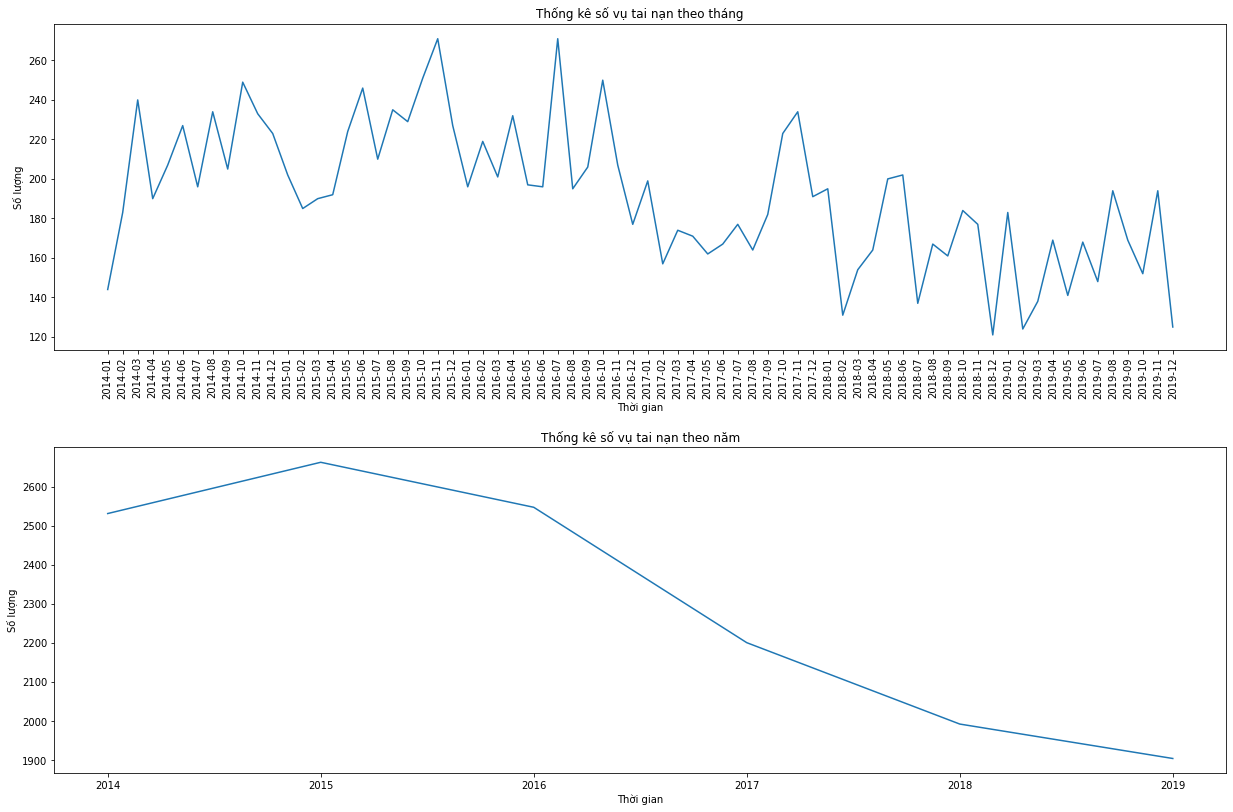

In [7]:
# tổng hợp số vụ theo tháng và vẽ bằng line chart rồi nhận xét
monthCount = df['Accident Date'].apply(lambda x: x[:-3]).value_counts().sort_index()
yearCount = df['Accident Date'].apply(lambda x: x[:4]).value_counts().sort_index()

fig, axs = plt.subplots(2,1, figsize=(17,11))
fig.tight_layout()
fig.subplots_adjust(hspace=0.3)

axs[0].set_xticklabels(monthCount.index, rotation=90)
axs[0].plot(monthCount.index, monthCount.values)
axs[0].set_title('Thống kê số vụ tai nạn theo tháng')
axs[0].set_xlabel('Thời gian')
axs[0].set_ylabel('Số lượng')

axs[1].set_xticklabels(yearCount.index, rotation=0)
axs[1].plot(yearCount.index, yearCount.values)
axs[1].set_title('Thống kê số vụ tai nạn theo năm')
axs[1].set_xlabel('Thời gian')
axs[1].set_ylabel('Số lượng')

- Vị trí các vụ tai nạn

In [8]:
# vẽ vị trí các vụ tai nạn lên map rồi nhận xét

**Thống kê khung thời gian xảy ra tai nạn trong ngày**
- Khoảng thời gian cao điểm của tai nạn giao thông trong ngày rơi vào từ 7 giờ đến 20 giờ. Có thể chia ra làm 2 khoảng cao điểm chính:
	- Từ 8h đến 9h: Khoảng thời gian bắt đầu đi làm.
	- Từ 15h đến 19h: Khoảng thời gian tan làm, đỉnh điểm rơi vào 1 tiếng đồng hồ từ 16h đến 17h.Trong khoảng thời gian này, số vụ tai nạn chiếm 34% tổng số vụ tai nạn xảy ra trong 6 năm.
- Do đó, cần chú ý khi tham gia giao thông vào giờ cao điểm.

Text(0.5, 1.0, 'So sánh số lượng tai nạn trong thời gian từ 15h - 19h')

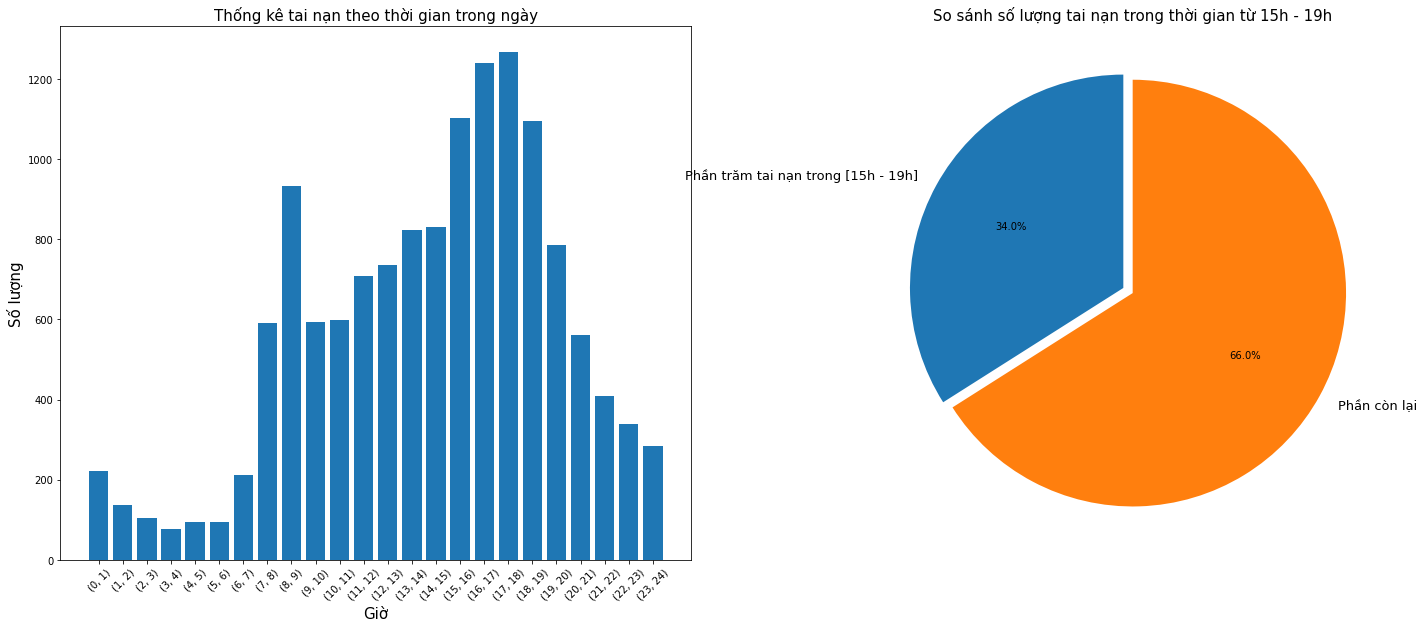

In [9]:
x_axis = makeXAxis(0,1,24)
y_axis = makeYAxis(df['Time (24hr)'].apply(lambda x: int(x[:2]) + int(x[3:5])/60), x_axis)

count1519 = np.sum(y_axis[-9:-5])/np.sum(y_axis)*100
sizePie = [count1519, 100-count1519]
labels = ['Phần trăm tai nạn trong [15h - 19h]', 'Phần còn lại']

fig, axs = plt.subplots(1,2, figsize=(20,8))
fig.tight_layout()
fig.subplots_adjust(wspace=0.2)

axs[0].bar([str(i) for i in x_axis], y_axis)
axs[0].set_xticklabels([str(i) for i in x_axis], rotation=45)
axs[0].set_xlabel('Giờ', fontsize=15)
axs[0].set_ylabel('Số lượng', fontsize=15)
axs[0].set_title('Thống kê tai nạn theo thời gian trong ngày', fontsize=15)

explode = (0.05, 0)
_,texts,_ = axs[1].pie(sizePie, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
texts[0].set_fontsize(13)
texts[1].set_fontsize(13)
axs[1].set_title('So sánh số lượng tai nạn trong thời gian từ 15h - 19h', fontsize=15)

**Liên hệ giữa độ tuổi, giới tính và mức độ nghiêm trọng của tai nạn**


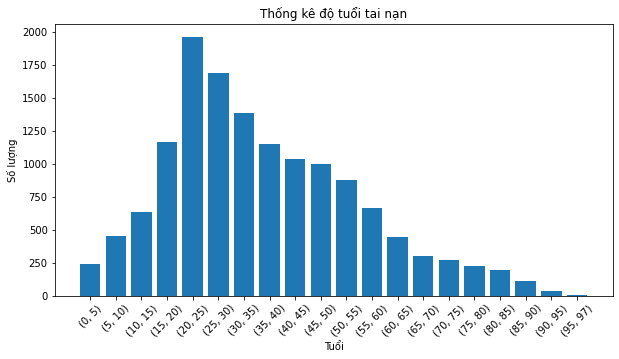

In [10]:
x_axis = makeXAxis(start=0, step=5, end=np.max(df['Age of Casualty']))
y_axis = makeYAxis(df['Age of Casualty'],x_axis)
draw(x_axis, y_axis, 'Thống kê độ tuổi tai nạn', 'Tuổi', 'Số lượng', (10,5))

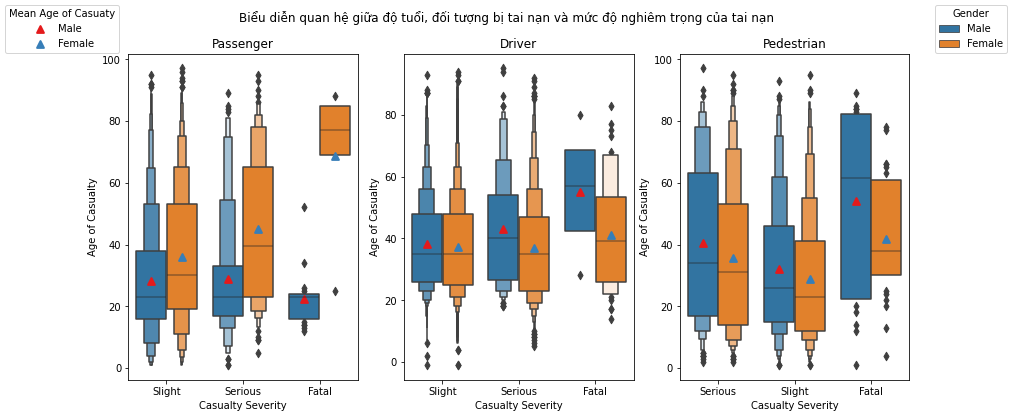

In [11]:
casualty_class = df['Casualty Class'].unique()

fig, axes = plt.subplots(1, 3, figsize=(14, 6))
fig.suptitle('Biểu diễn quan hệ giữa độ tuổi, đối tượng bị tai nạn và mức độ nghiêm trọng của tai nạn')
for i in range(len(casualty_class)):
    data_df = df[df['Casualty Class'] == casualty_class[i]]
    sns.boxenplot(data=data_df, x='Casualty Severity', y='Age of Casualty', hue='Sex of Casualty', ax=axes[i])
    sns.pointplot(data=data_df, x='Casualty Severity', y='Age of Casualty', hue='Sex of Casualty',
                  linestyles='None', errwidth=0, dodge=0.4, markers=['^', '^'], palette='Set1', ax=axes[i])
    
    axes[i].get_legend().remove()
    axes[i].set_title(casualty_class[i])

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles[:2], labels[:2], title='Gender')
fig.legend(handles[2:], labels[2:], title='Mean Age of Casuaty', loc='upper left')

- Quan sát cả 2 biểu đồ trên, có thể kết luận rằng
    - Độ tuổi dễ gây tai nạn giao động từ 15 đến 50.
    - Độ tuổi bị tai nạn trung bình của nữ thấp hơn nam đối với đối tượng bị tai nạn là người điều khiển phương tiện và người đi bộ. Đối với đối tượng là hành khách đi cùng, độ tuổi trung bình của nữ cao hơn nam.
    - Trong đó
        - Đối với đối tượng tai nạn là hành khách đi cùng, nữ chiếm đa số. Do điều kiện sức khoẻ cũng như khả năng phản ứng của nữ thường thấp hơn nam nên số ca nữ thường nhiều hơn và bị thương nặng hơn.
        - Đối với đối tượng tai nạn là người điều khiển phương tiện, tỷ lệ gây tai nạn là như nhau; số ca tử vong của nữ nhiều hơn nam và phân bố từ khoảng 16 đến trên 80 tuổi; độ tuổi từ khoảng 22-58 đối với nữ, 40-68 đối với nam có tỷ lệ tử vong do điều khiển phương tiện cao nhất. Dễ thấy, các đối tượng gây/bị tai nạn đang trong độ tuổi của sự nghiệp. Việc vội vàng trong công việc ở một đất nước như UK là hoàn toàn có thể hiểu được.
        - Đối với người đi bộ, nam giới gây/bị tai nạn nhiều hơn nữ giới. Quan sát đường trung vị ở nam giới tử vong, ta thấy hơn 50% các trường hợp này có độ tuổi trên 60. Do đó, đối tượng nam là người già cần phải chú ý khi tham gia giao thông hoặc khi ra đường, cần có người bảo hộ đi cùng.
    - Đặc biệt, đối với đối tượng tai nạn là người điều khiển phương tiện, xuất hiện các vụ tai nạn với độ tuổi kéo dài từ 0-20 tuổi và mức độ từ nhẹ đến nghiêm trọng. Trong khi độ tuổi được phép lái xe là từ 16 tuổi. Do đó, phụ huynh cần chú ý đến hành vi của trẻ trong độ tuổi này để tránh tai nạn đáng tiếc.

## Rút trích luật sử dụng cây quyết định

- Sử dụng cây quyết định để tìm các luật về mức độ nghiêm trọng khi xảy ra tai nạn
- Cây quyết định được setup với chiều cao tối đa là 5, sử dụng độ đo `entropy` để phân hoạch
- Thuộc tính lớp: `Casualty Severity`

In [12]:
# encode dữ liệu để đưa vào model
df['Time (24hr)'] = df['Time (24hr)'].apply(lambda x: int(x[:2]) + int(x[3:5])/60)

feature_cols = ['Number of Vehicles', 'Time (24hr)', '1st Road Class', 'Road Surface',
                'Lighting Conditions', 'Weather Conditions','Type of Vehicle', 'Casualty Class', 'Sex of Casualty',
                'Age of Casualty']
X = df[feature_cols]        # attributes
y = df['Casualty Severity'] # class

realValues = {} # lưu lại giá trị thực sau khi encode
numberEncoder = preprocessing.LabelEncoder()
for col in feature_cols[2:9]:
    X[col] = numberEncoder.fit_transform(X[col])
    realValues[col] = numberEncoder.classes_

# kiểm định
def evaluate(model, features_testset, targets_testset):
    targets_pred = model.predict(features_testset)
    print(f'Accuracy: {metrics.accuracy_score(targets_testset, targets_pred)}')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


Accuracy: 0.855553146903678


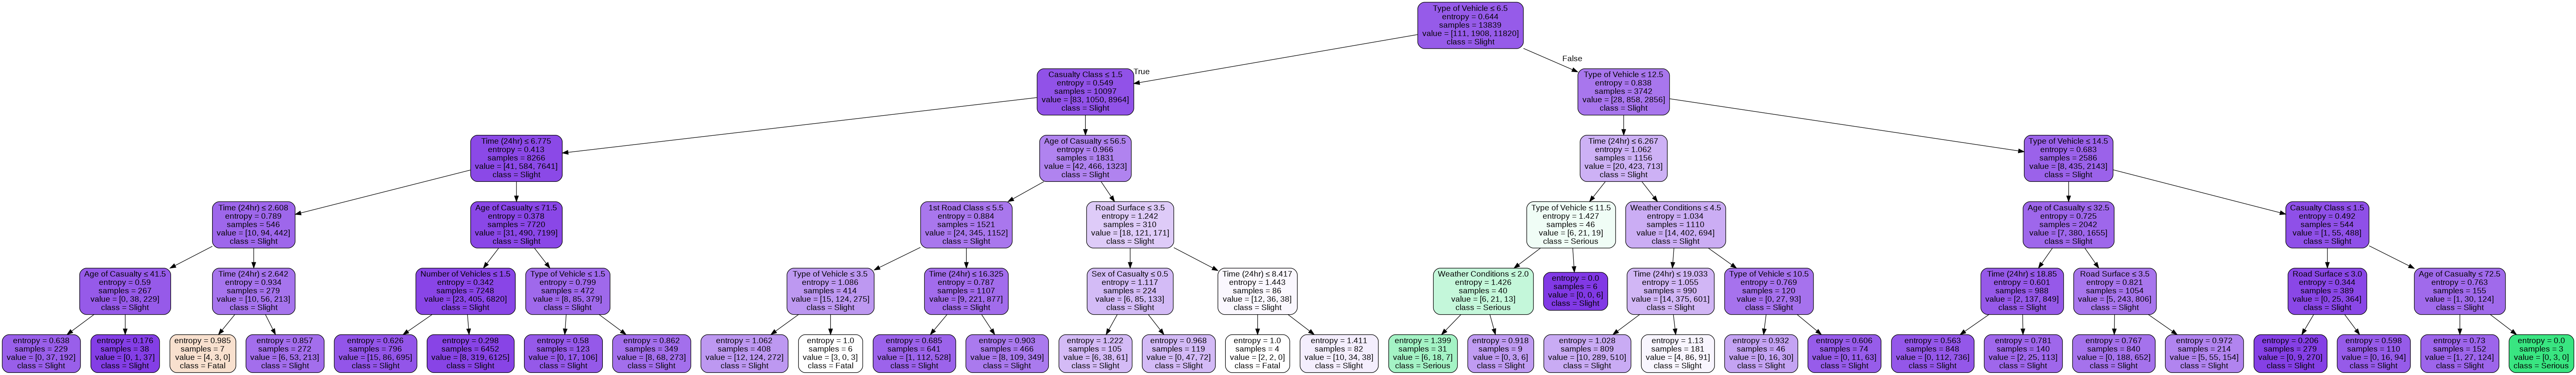

In [20]:
# visualize decision tree
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dt = DecisionTreeClassifier(criterion="entropy", max_depth=5)
dt.fit(X, y)

dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=feature_cols, class_names=dt.classes_)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('rules.png')

evaluate(dt, X, y)
Image(graph.create_png())

In [14]:
# rules
print(f"1.  Type of Vehicle = {realValues['Type of Vehicle'][:7]}, Casualty Class = {realValues['Casualty Class'][:2]}, Time (24hr) <= 2.61, class: Slight | prob: 229/267={229/267}\n")
print(f"2.  Type of Vehicle = {realValues['Type of Vehicle'][:7]}, Casualty Class = {realValues['Casualty Class'][:2]}, 2.61 < Time (24hr) <= 2.64, class: Fatal | prob: 4/7={4/7}\n")
print(f"3.  Type of Vehicle = {realValues['Type of Vehicle'][:7]}, Casualty Class = {realValues['Casualty Class'][:2]}, 2.64 < Time (24hr) <= 6.78, class: Slight | prob: 213/272={213/272}\n")
print(f"4.  Type of Vehicle = {realValues['Type of Vehicle'][:7]}, Casualty Class = {realValues['Casualty Class'][:2]}, Time (24hr) > 6.78, class: Slight | prob: 7199/7720={7199/7720}\n")
print(f"5.  Type of Vehicle = {realValues['Type of Vehicle'][:4]}, Casualty Class = {realValues['Casualty Class'][2:]}, Age of Casualty <= 56, 1st Road Class = {realValues['1st Road Class'][:6]}, class: Slight | prob: 272/480={272/480}\n")
print(f"6.  Type of Vehicle = {realValues['Type of Vehicle'][4:7]}, Casualty Class = {realValues['Casualty Class'][2:]}, Age of Casualty <= 56, 1st Road Class = {realValues['1st Road Class'][:6]}, class: Fatal | prob: 3/6={3/6}\n")
print(f"7.  Type of Vehicle = {realValues['Type of Vehicle'][:7]}, Casualty Class = {realValues['Casualty Class'][2:]}, Age of Casualty <= 56, 1st Road Class = {realValues['1st Road Class'][6:]}, class: Slight | prob: 877/1107={877/1107}\n")
print(f"8.  Type of Vehicle = {realValues['Type of Vehicle'][:7]}, Casualty Class = {realValues['Casualty Class'][2:]}, Age of Casualty >  56, Road Surface = {realValues['Road Surface'][:4]}, class: Slight | prob: 133/224={133/224}\n")
print(f"9.  Type of Vehicle = {realValues['Type of Vehicle'][:7]}, Casualty Class = {realValues['Casualty Class'][2:]}, Age of Casualty >  56, Road Surface = {realValues['Road Surface'][4:]}, Time (24hr) <= 8.42, class: Fatal | prob: 2/4={2/4}\n")
print(f"10. Type of Vehicle = {realValues['Type of Vehicle'][:7]}, Casualty Class = {realValues['Casualty Class'][2:]}, Age of Casualty >  56, Road Surface = {realValues['Road Surface'][4:]}, Time (24hr) >  8.42, class: Slight | prob: 38/82={38/82}\n")
print(f"11. Type of Vehicle = {realValues['Type of Vehicle'][7:12]}, Time (24hr) <= 6.27, Weather Conditions = {realValues['Weather Conditions'][:3]}, class: Serious | prob: 18/31={18/31}\n")
print(f"12. Type of Vehicle = {realValues['Type of Vehicle'][7:12]}, Time (24hr) <= 6.27, Weather Conditions = {realValues['Weather Conditions'][3:]}, class: Slight | prob: 6/9={6/9}\n")
print(f"13. Type of Vehicle = {realValues['Type of Vehicle'][12:13]}, Time (24hr) <= 6.27, class: Slight | prob: 6/6={6/6}\n")
print(f"14. Type of Vehicle = {realValues['Type of Vehicle'][7:13]}, Time (24hr) >  6.27, class: Slight | prob: 694/1110={694/1110}\n")
print(f"15. Type of Vehicle = {realValues['Type of Vehicle'][13:15]}, class: Slight | prob: 1655/2042={1655/2042}\n")
print(f"16. Type of Vehicle = {realValues['Type of Vehicle'][15:]}, Casualty Class = {realValues['Casualty Class'][:2]}, class: Slight | prob: 364/389={364/389}\n")
print(f"17. Type of Vehicle = {realValues['Type of Vehicle'][15:]}, Casualty Class = {realValues['Casualty Class'][2:]}, Age of Casualty <= 72, class: Slight | prob: 124/152={124/152}\n")
print(f"18. Type of Vehicle = {realValues['Type of Vehicle'][15:]}, Casualty Class = {realValues['Casualty Class'][2:]}, Age of Casualty >  72, class: Serious | prob: 3/3={3/3}\n")

1.  Type of Vehicle = ['Agricultural vehicle (includes diggers etc.)'
 'Bus or coach (17 or more passenger seats)' 'Car'
 'Goods vehicle 3.5 tonnes mgw and under'
 'Goods vehicle 7.5 tonnes mgw and over'
 'Goods vehicle over 3.5 tonnes and under 7.5 tonnes mgw'
 'Minibus (8 – 16 passenger seats)'], Casualty Class = ['Driver' 'Passenger'], Time (24hr) <= 2.61, class: Slight | prob: 229/267=0.8576779026217228

2.  Type of Vehicle = ['Agricultural vehicle (includes diggers etc.)'
 'Bus or coach (17 or more passenger seats)' 'Car'
 'Goods vehicle 3.5 tonnes mgw and under'
 'Goods vehicle 7.5 tonnes mgw and over'
 'Goods vehicle over 3.5 tonnes and under 7.5 tonnes mgw'
 'Minibus (8 – 16 passenger seats)'], Casualty Class = ['Driver' 'Passenger'], 2.61 < Time (24hr) <= 2.64, class: Fatal | prob: 4/7=0.5714285714285714

3.  Type of Vehicle = ['Agricultural vehicle (includes diggers etc.)'
 'Bus or coach (17 or more passenger seats)' 'Car'
 'Goods vehicle 3.5 tonnes mgw and under'
 'Goods veh

## Dự đoán mức độ nghiêm trọng của tai nạn

- Sử dụng Random Forest
- Tìm kiếm bộ tham số tốt nhất
    - Sử dụng kỹ thuật Cross Validation (k = 3 folds)
    - Khởi tạo không gian tìm kiếm
    - Do không gian tìm kiếm lớn, chọn ngẫu nhiên 100 trạng thái trong không gian này để fit với dữ liệu train. Từ đó thu được bộ tham số tốt nhất trong số 100 bộ tham số lấy ngẫu nhiên
- Sử dụng bộ tham số này để dự đoán tập Test và in ra accuracy

In [15]:
# divide train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=69) # 70% training and 30% test

In [16]:
# chọn bộ siêu tham số tốt
# tham khảo: https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
criterion = ['gini', 'entropy']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
max_features = ['auto', 'sqrt', 'log2', None]
bootstrap = [True]
params = {'n_estimators': n_estimators,
          'criterion': criterion,
          'max_features': max_features,
          'max_depth': max_depth,
          'min_samples_split': min_samples_split,
          'min_samples_leaf': min_samples_leaf,
          'bootstrap': bootstrap}

anotherDt = RandomForestClassifier()
dt_random_search = RandomizedSearchCV(estimator=anotherDt, n_iter = 100, param_distributions=params, cv=3, verbose=2, n_jobs = -1)
dt_random_search.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 19.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 38.0min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [17]:
dt_random_search.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 100,
 'max_features': 'log2',
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 1000}

In [18]:
best_rf = dt_random_search.best_estimator_
evaluate(best_rf, X_test, y_test)

Accuracy: 0.8542870905587668


**Các thuộc tính quan trọng**: In ra ác thuộc tính quan trọng có tính quyết định đến phân lớp

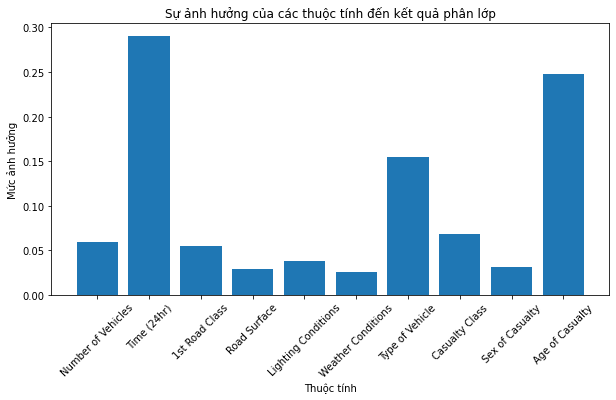

In [29]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X.columns, best_rf.feature_importances_):
    feats[feature] = importance # add the name/value pair 

draw(feats.keys(), feats.values(), title='Sự ảnh hưởng của các thuộc tính đến kết quả phân lớp', x_label='Thuộc tính', y_label='Mức ảnh hưởng',size=(10,5))

**So sánh độ chính xác với cây quyết định bình thường**

In [19]:
bulShitDt = DecisionTreeClassifier(max_depth=5)
bulShitDt.fit(X_train, y_train)
evaluate(bulShitDt, X_test, y_test)

Accuracy: 0.8511560693641619


- RF Acc: 0.8542
- DT Acc: 0.8511
- Chính xác hơn 0.3642% :)